In [6]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
import matplotlib.pyplot as plt
%matplotlib inline

seed = 7
np.random.seed(seed)
listi=[]
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32")

X_train = X_train / 255
X_test = X_test / 255

Y_test_bk = Y_test.copy()
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

# 定義模型
model = Sequential()

#定義第1組的卷積和池化層
model.add(Conv2D(16, kernel_size=(5, 5), padding="same",      #用16個5x5的Conv2D filter(如上圖)
                 input_shape=(28, 28, 1), activation="relu")) #input為每一張圖片的大小 #最後的1為色彩通道
model.add(MaxPooling2D(pool_size=(2, 2)))

#定義第2組的卷積和池化層
model.add(Conv2D(32, kernel_size=(5, 5), padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

#定義Dropout、平坦層和全連階層
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

In [7]:
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"])

history = model.fit(X_train, Y_train, validation_split=0.2, #拿60000筆資料中的20%做驗證
                   epochs=2, batch_size=128,verbose = 2)

loss, accuracy = model.evaluate(X_test, Y_test)
print("Accuracy: ", accuracy)

Y_pred = model.predict_classes(X_test)

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
 - 16s - loss: 0.3888 - accuracy: 0.8781 - val_loss: 0.0777 - val_accuracy: 0.9764
Epoch 2/2
 - 16s - loss: 0.1231 - accuracy: 0.9629 - val_loss: 0.0520 - val_accuracy: 0.9846
10000/10000 [==============================] - 1s 111us/step
Accuracy:  0.9865000247955322


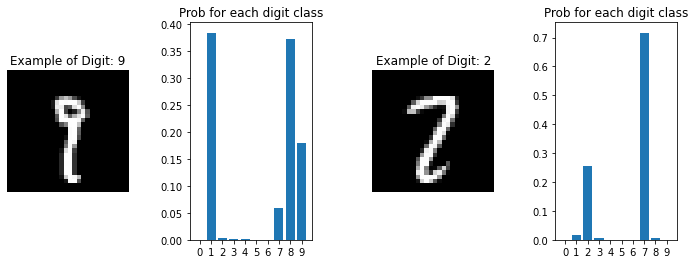

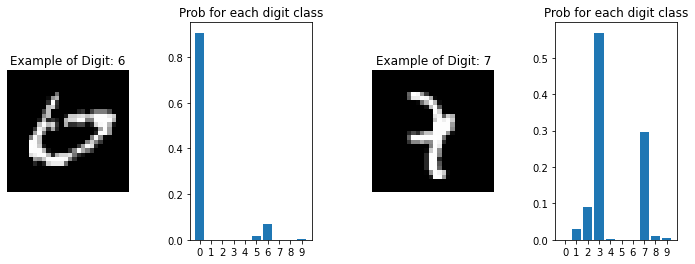

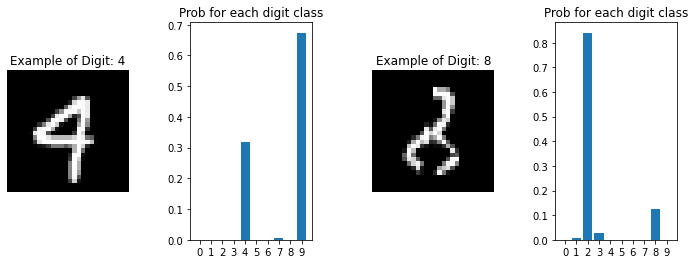

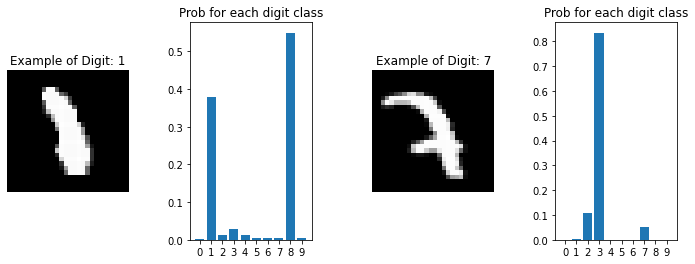

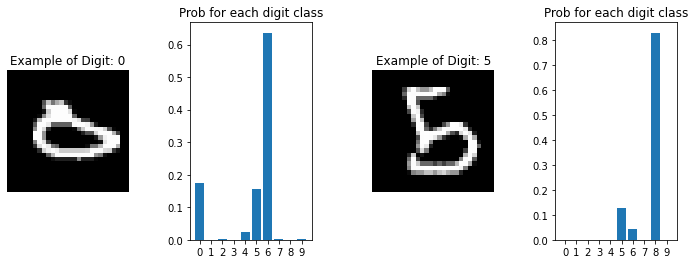

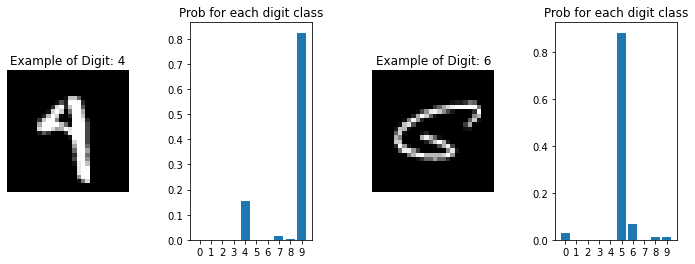

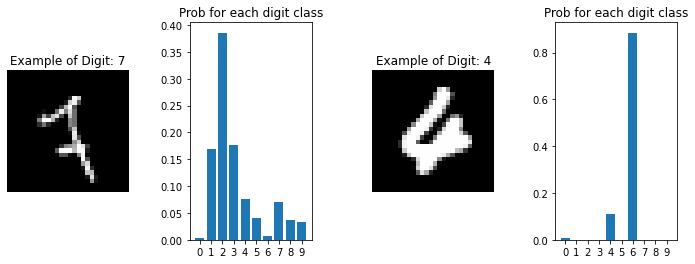

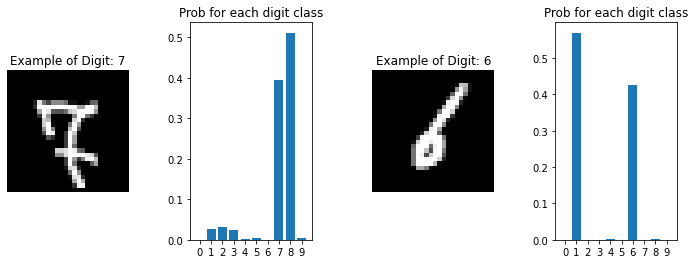

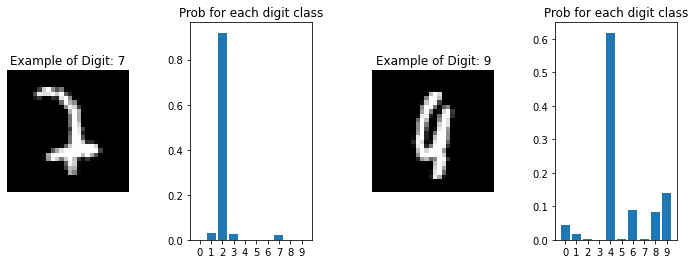

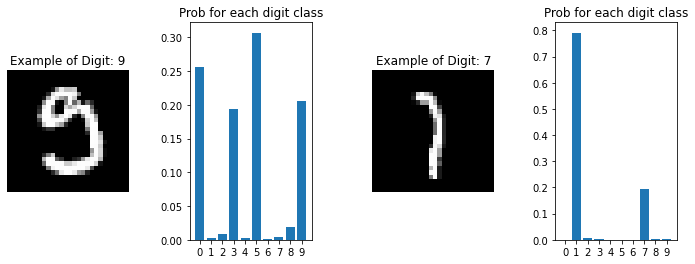

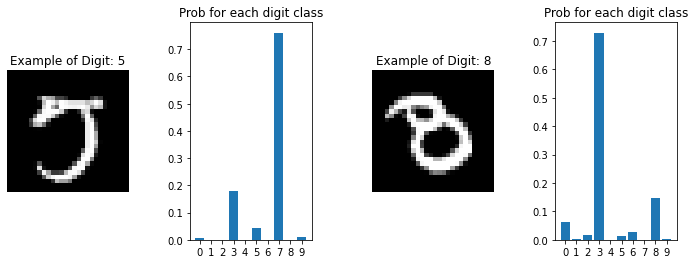

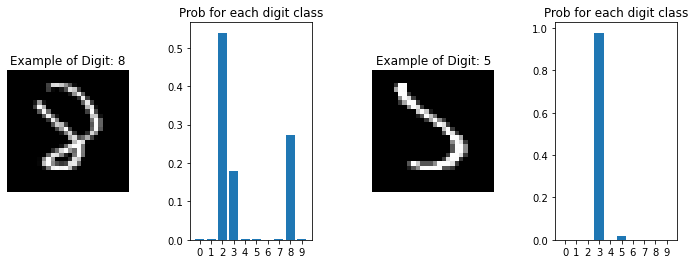

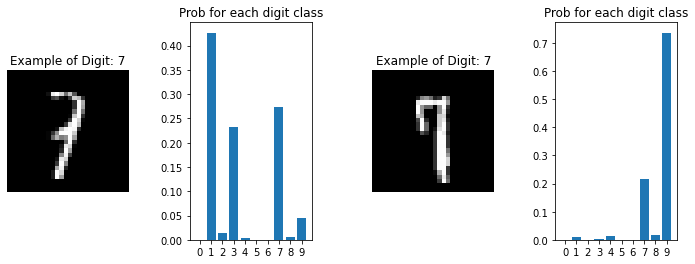

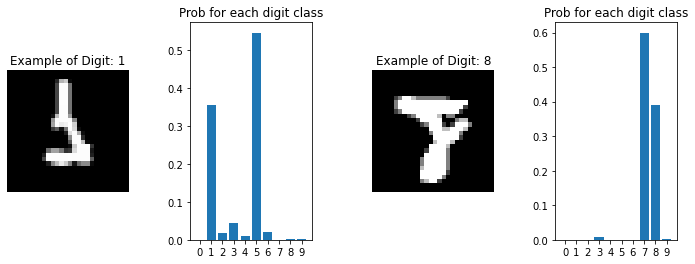

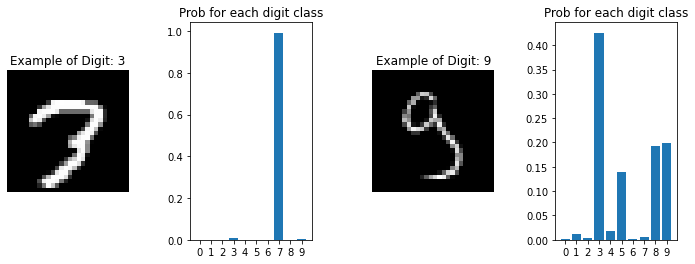

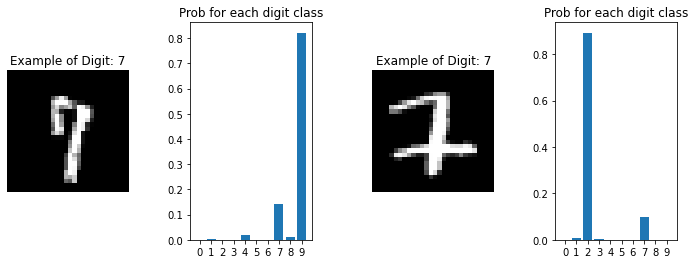

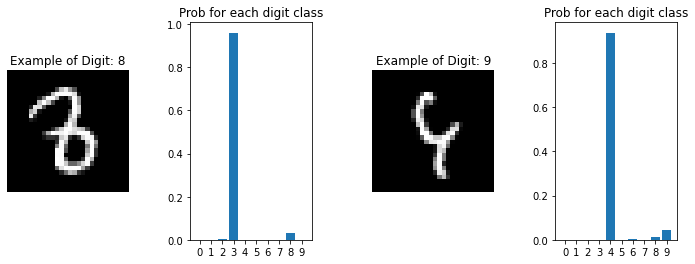

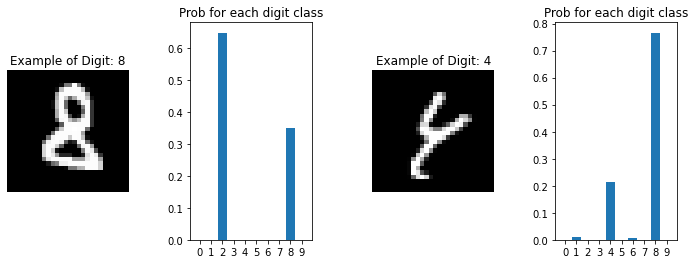

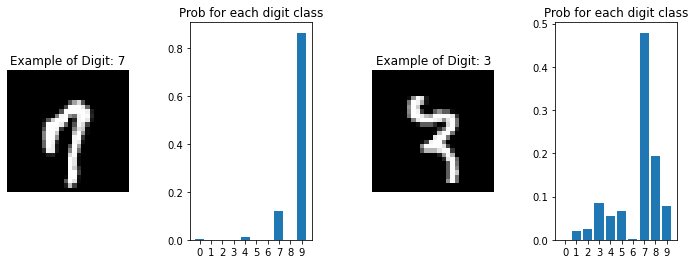

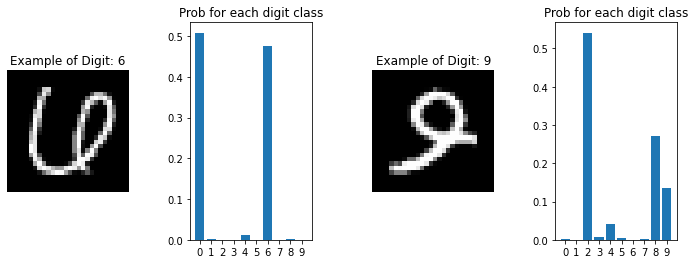

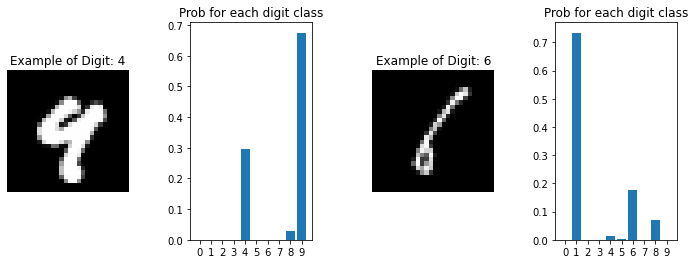

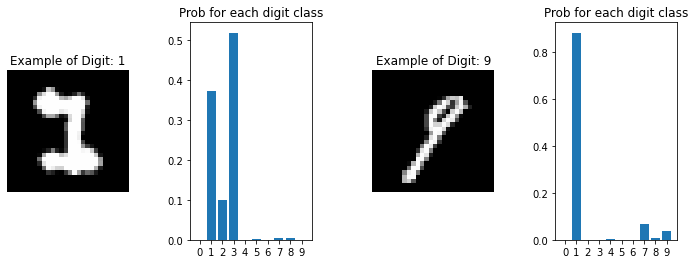

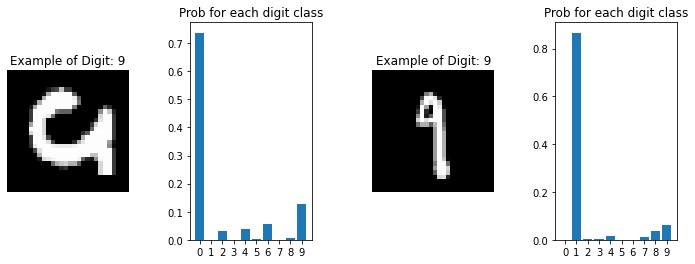

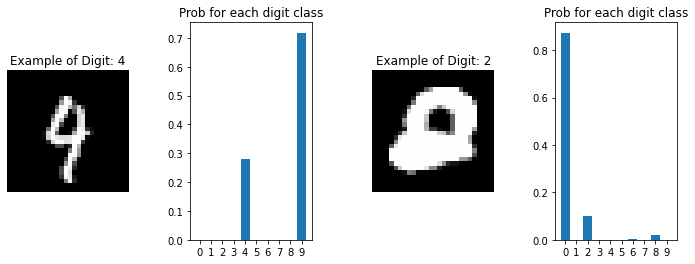

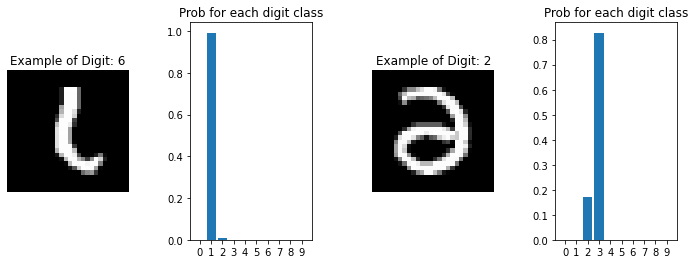

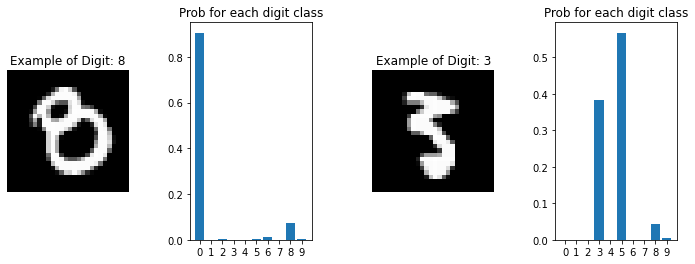

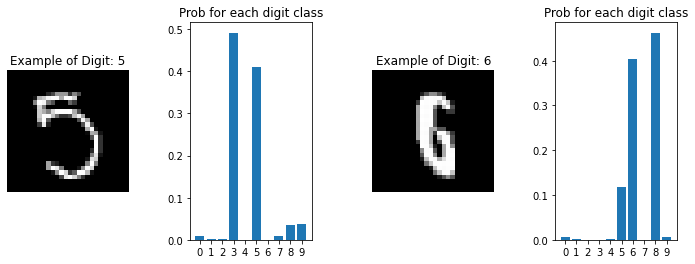

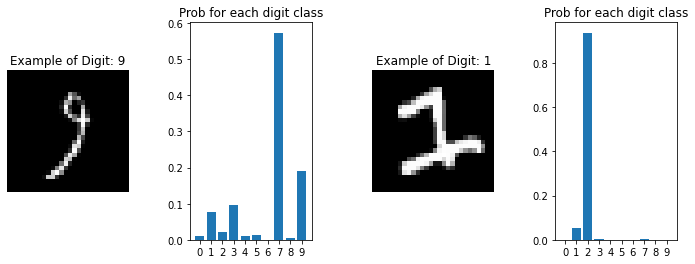

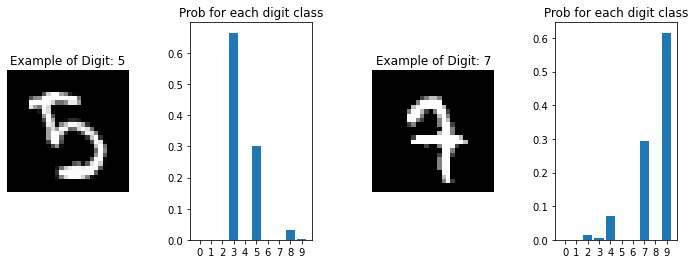

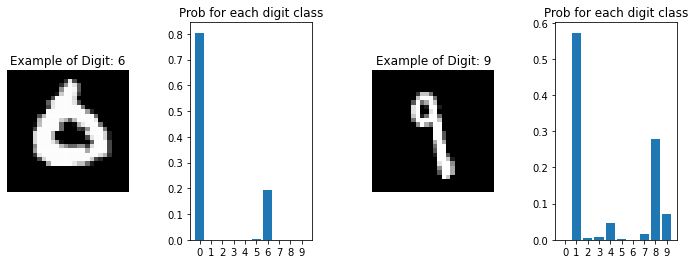

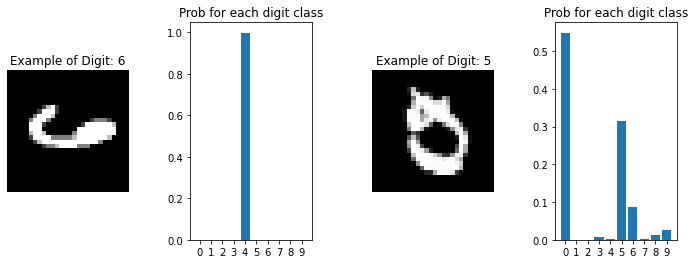

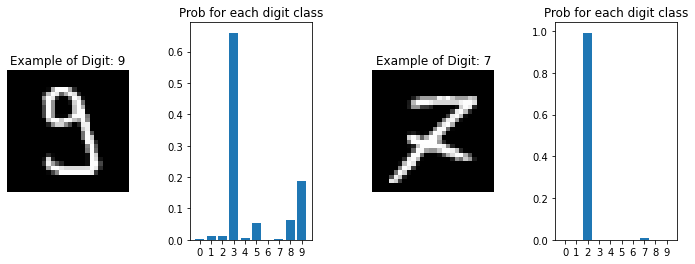

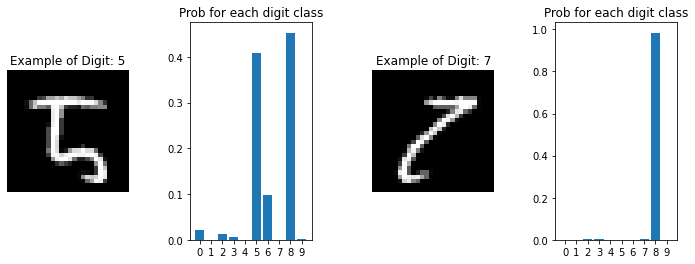

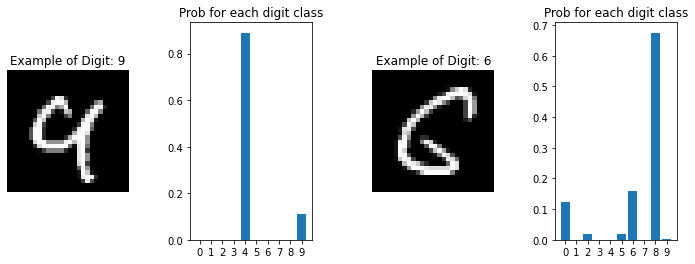

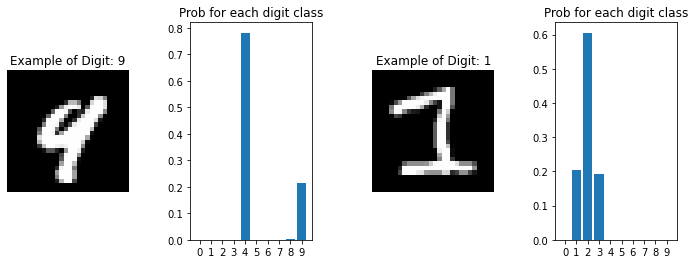

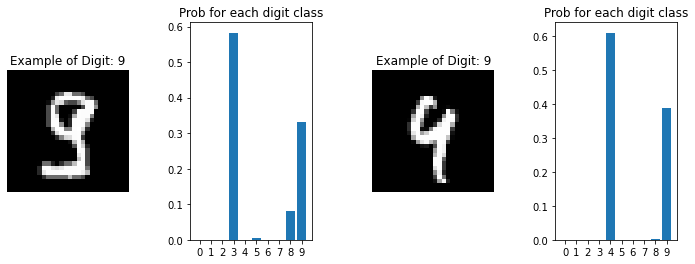

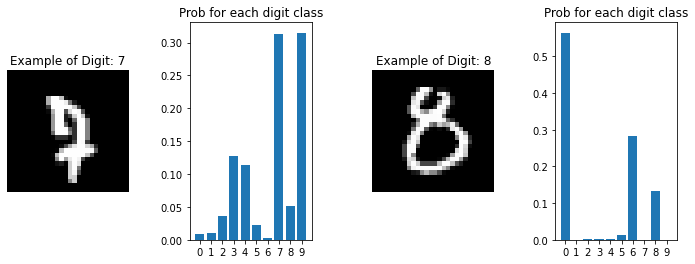

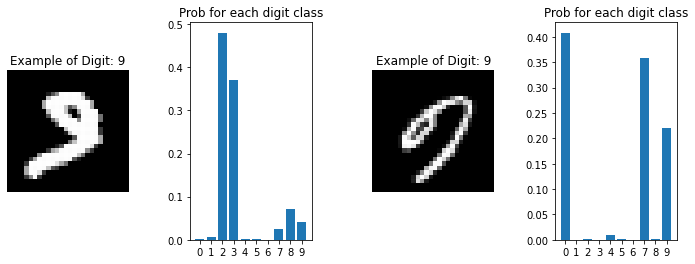

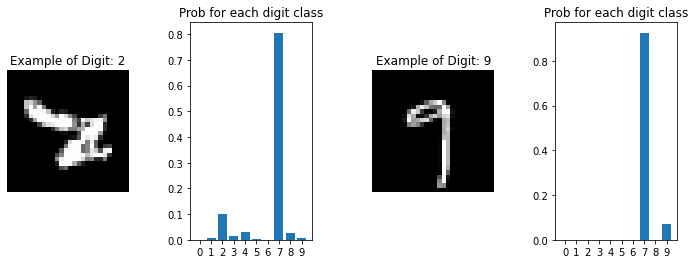

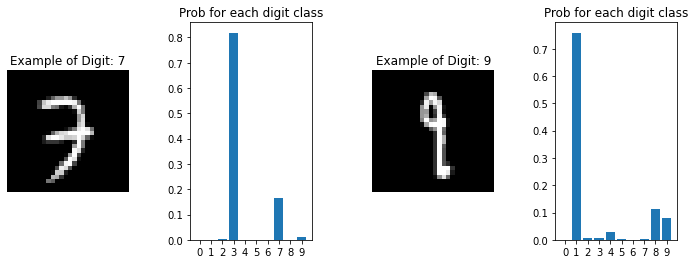

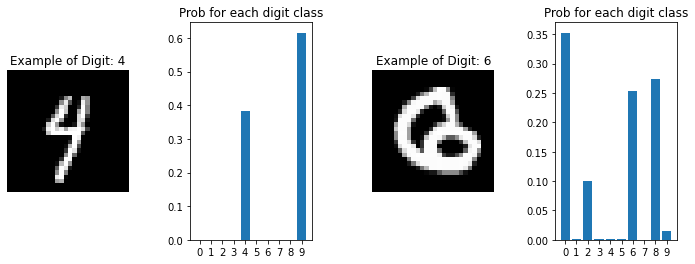

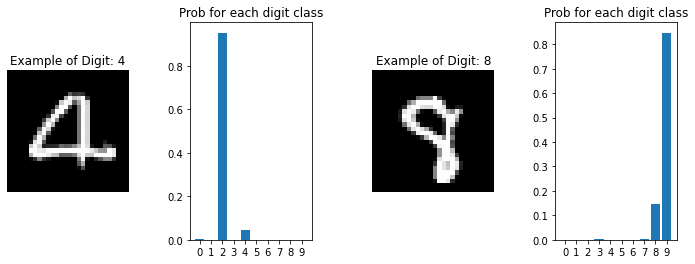

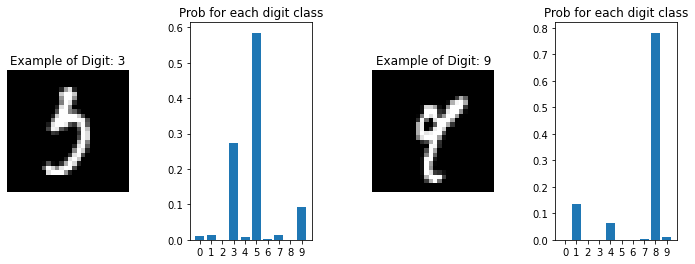

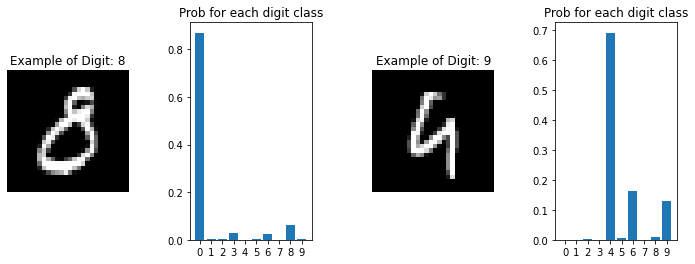

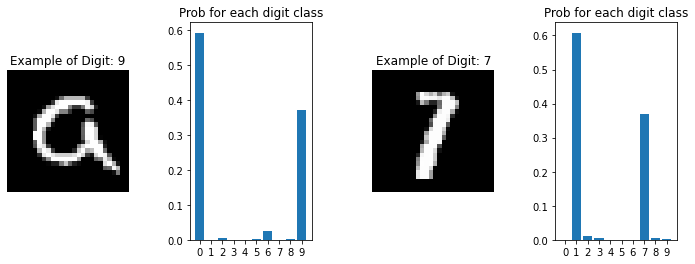

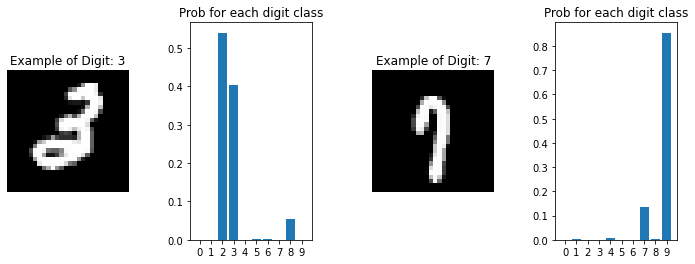

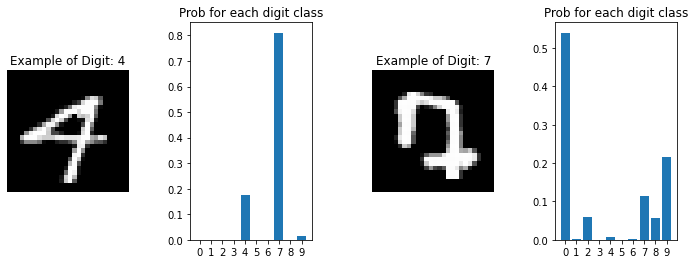

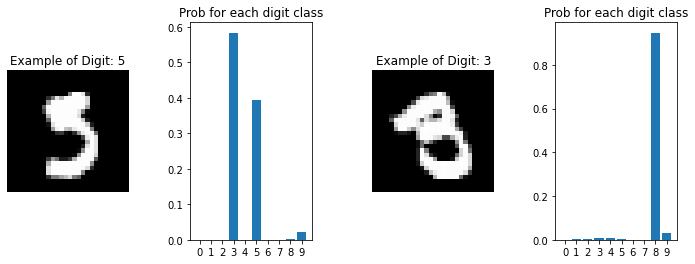

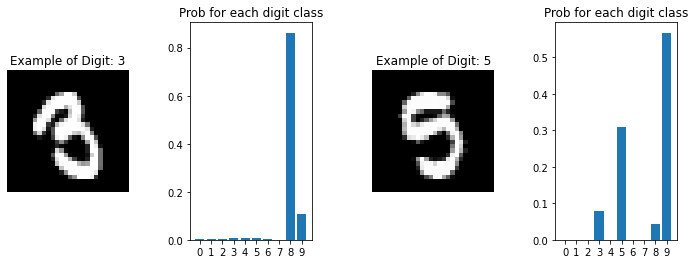

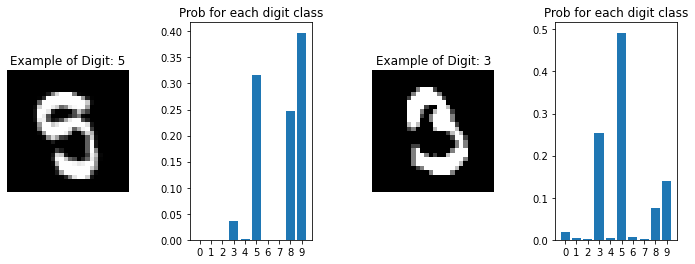

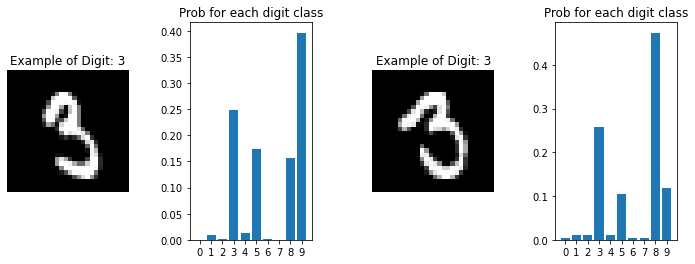

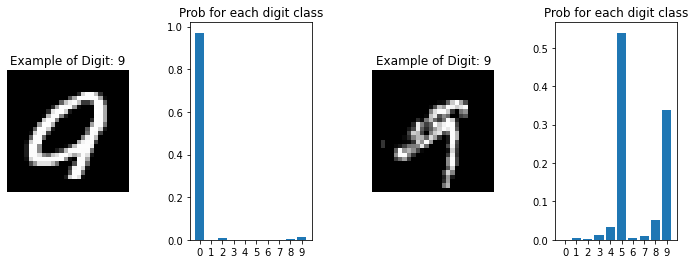

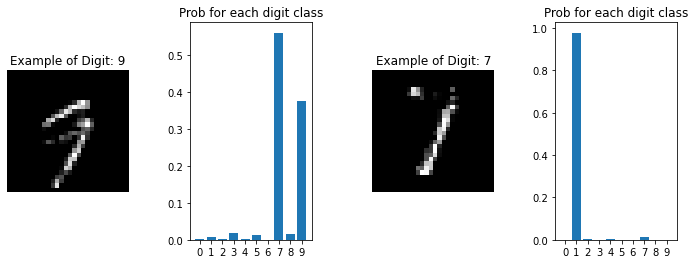

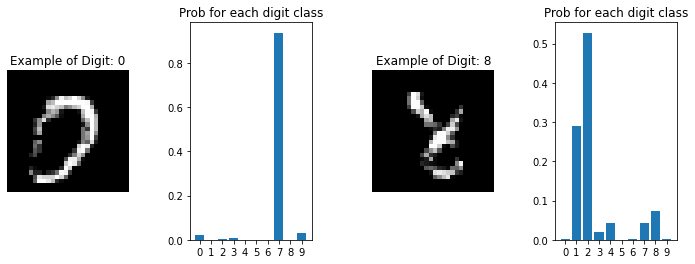

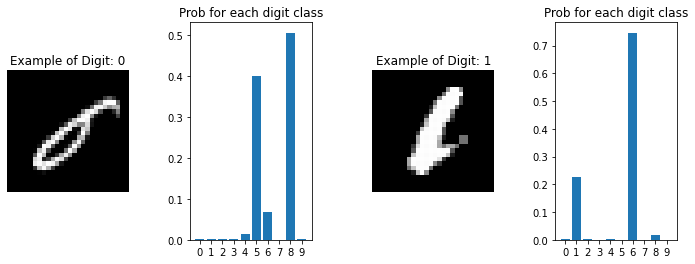

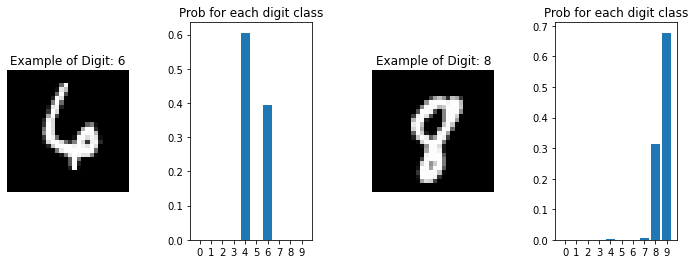

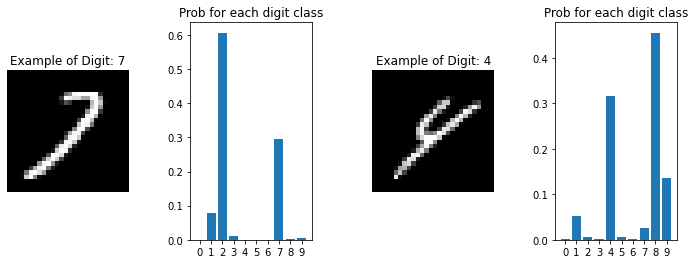

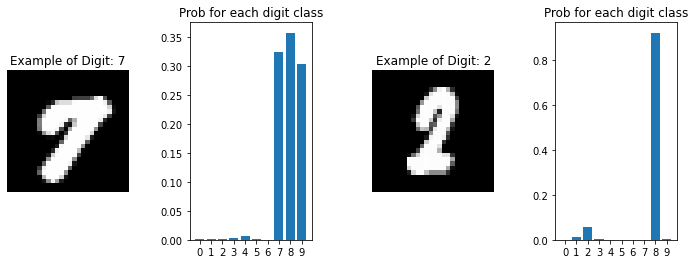

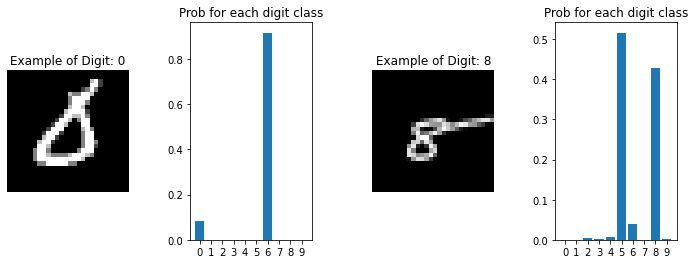

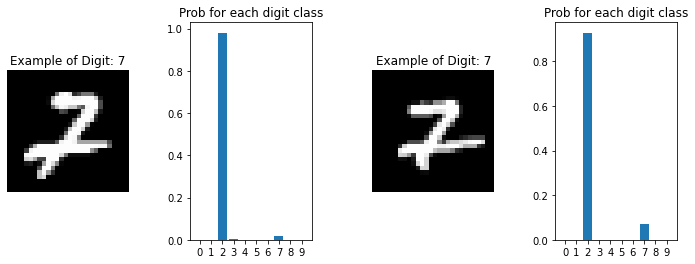

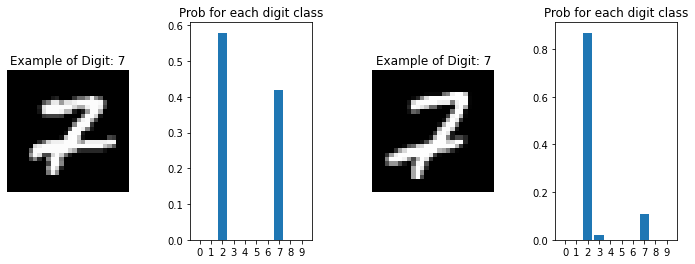

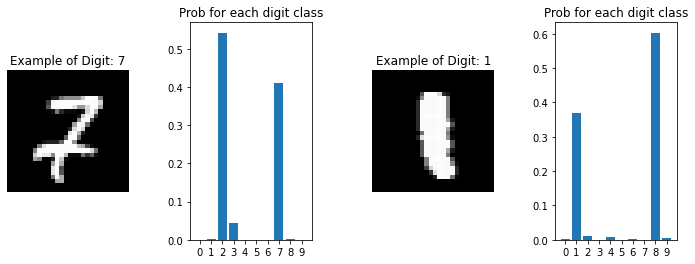

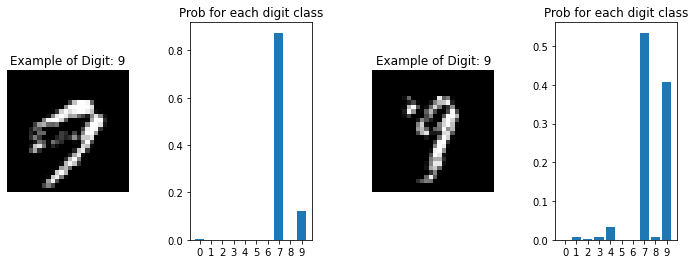

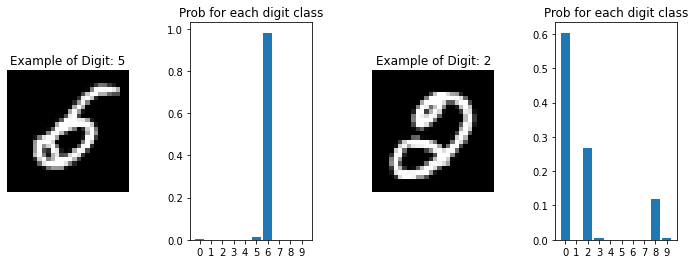

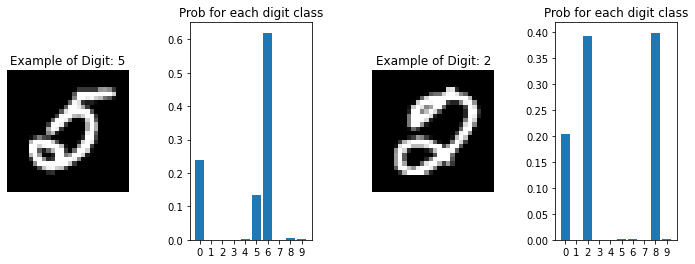

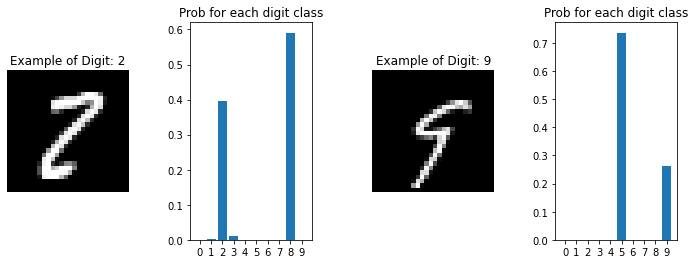

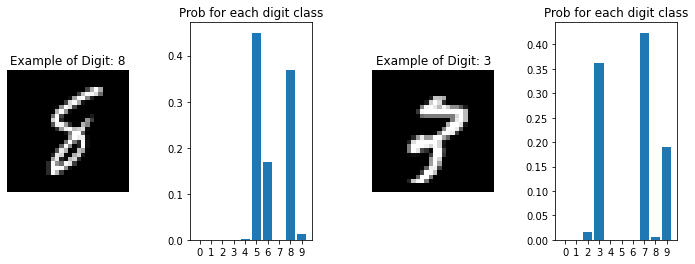

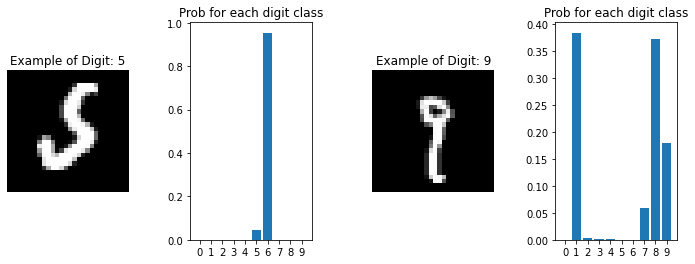

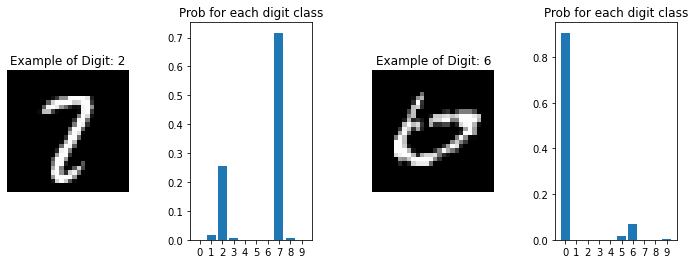

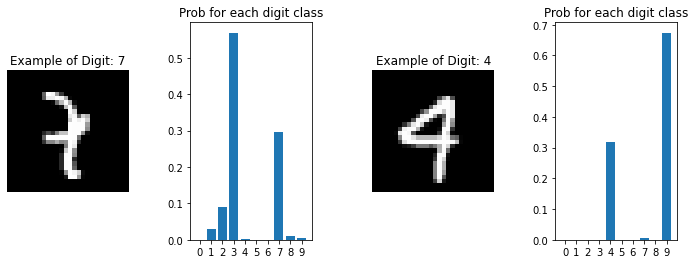

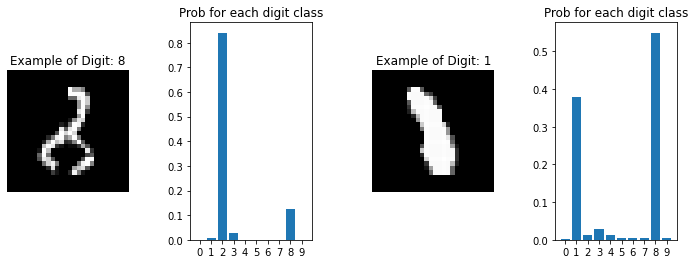

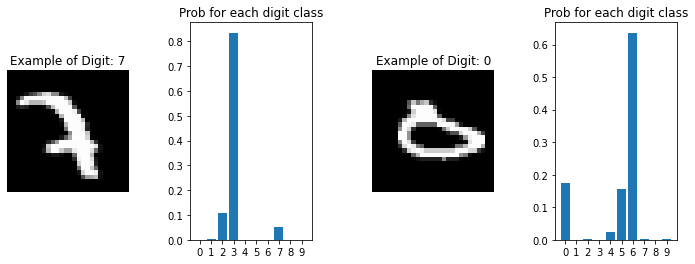

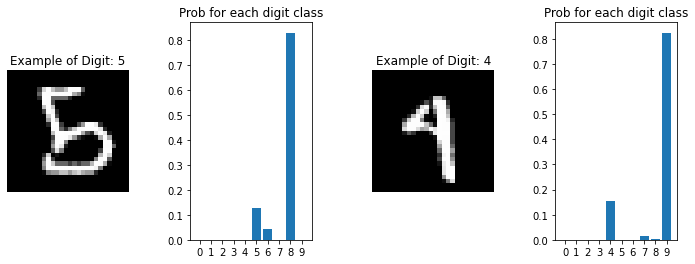

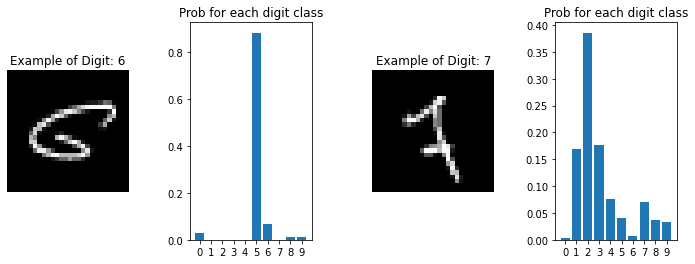

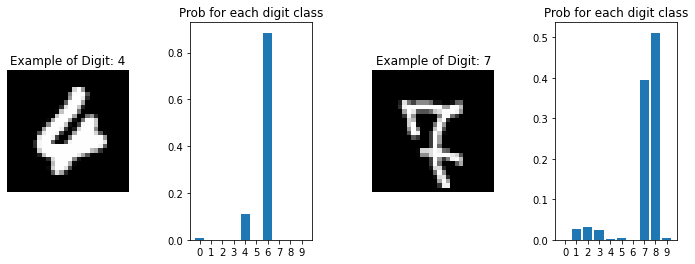

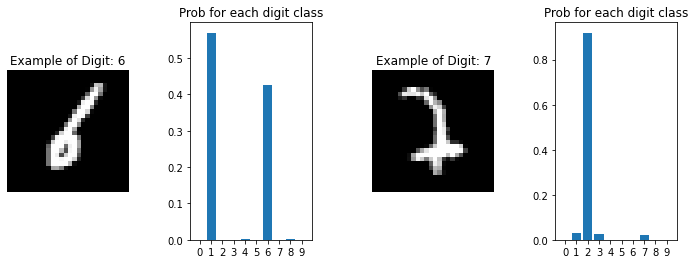

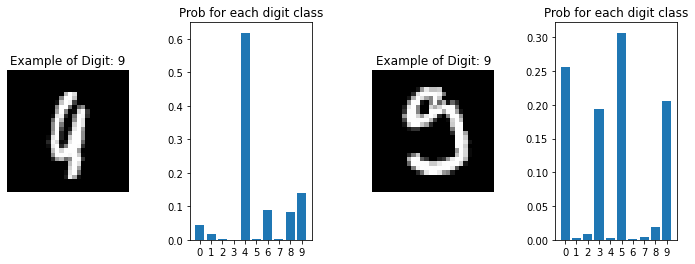

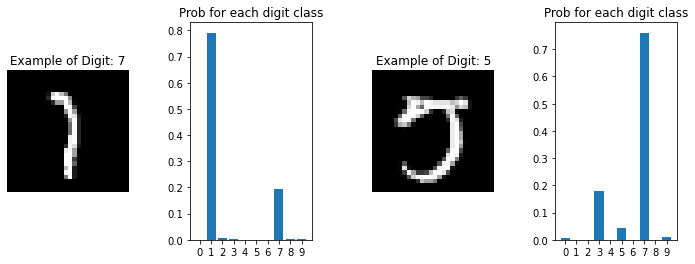

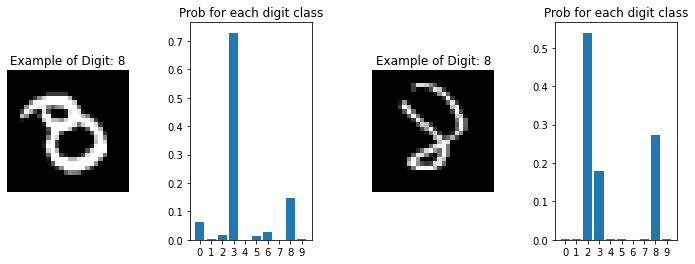

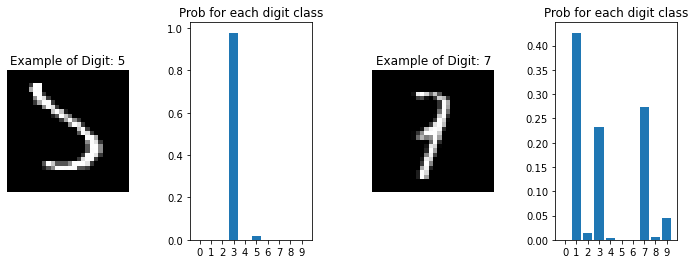

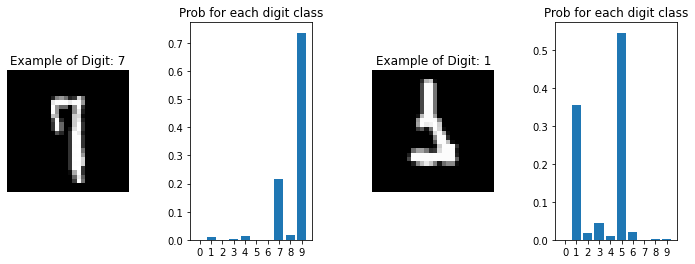

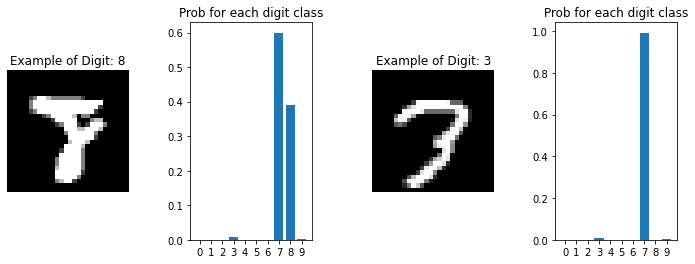

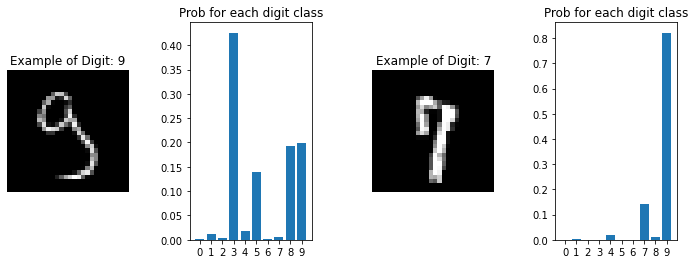

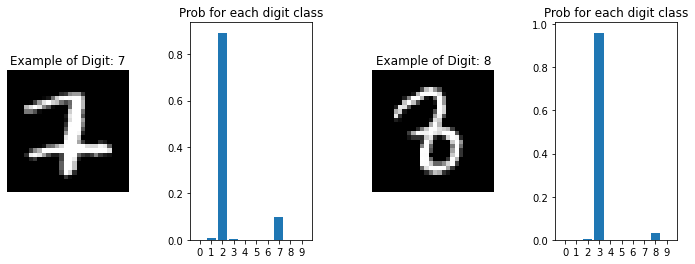

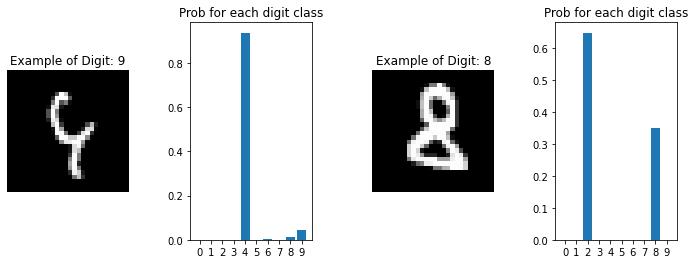

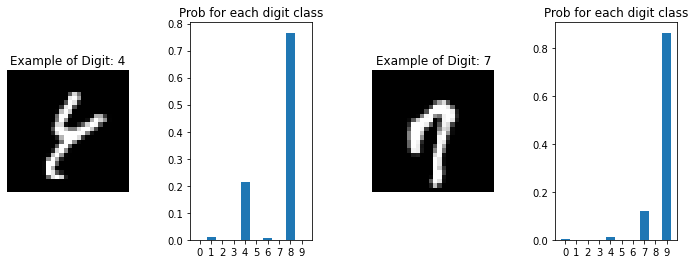

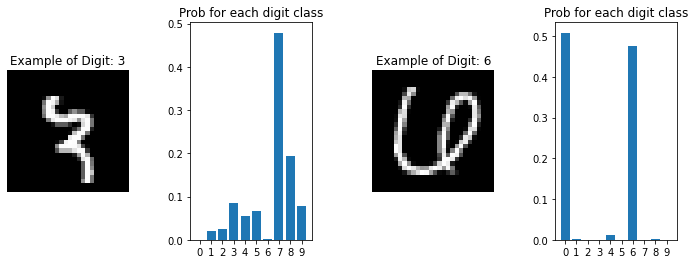

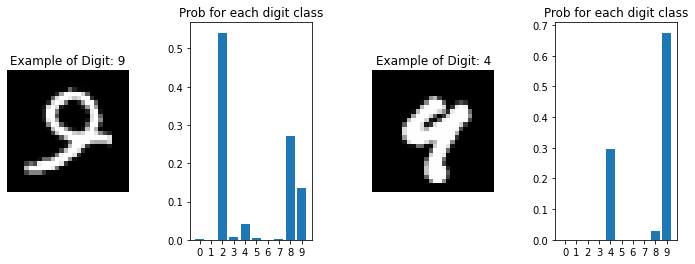

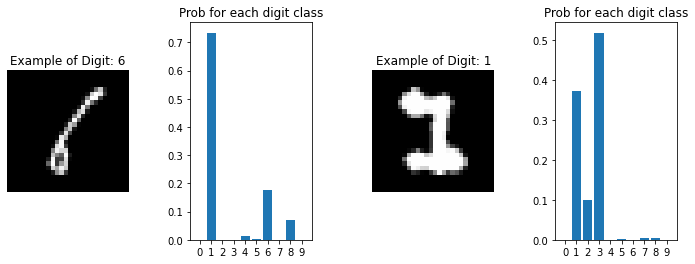

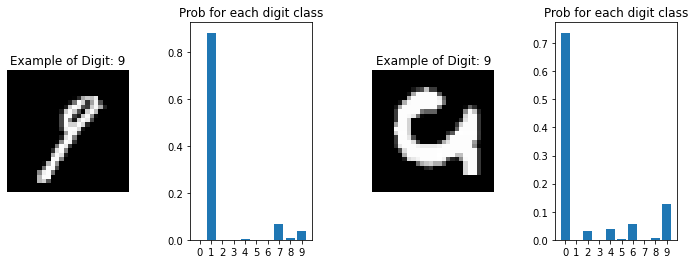

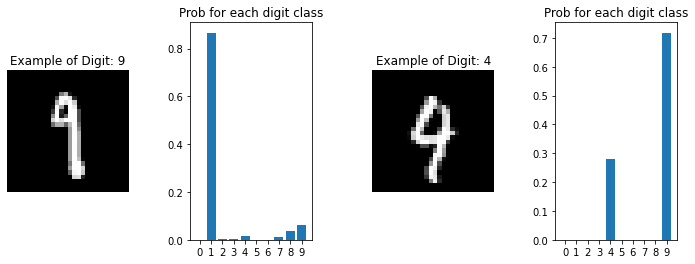

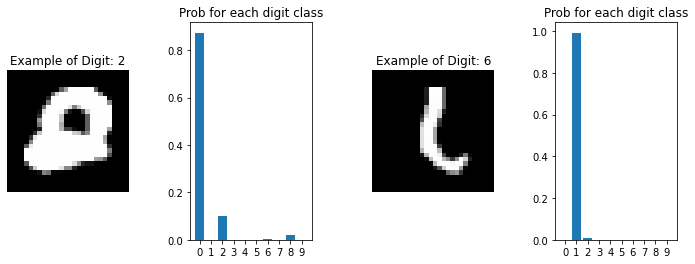

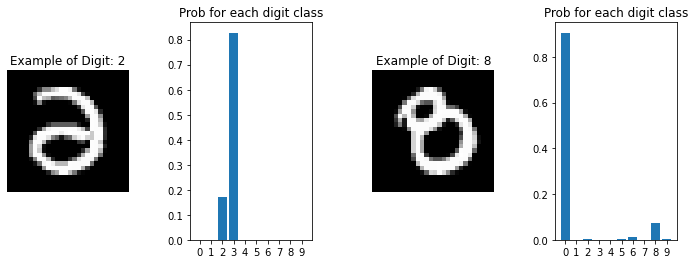

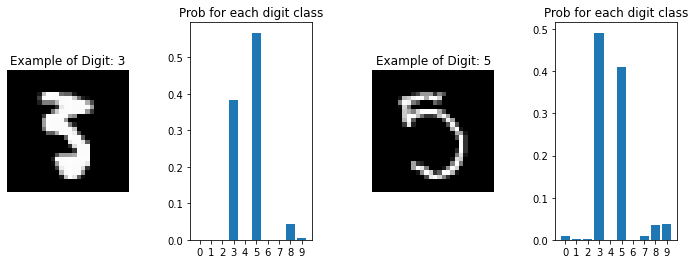

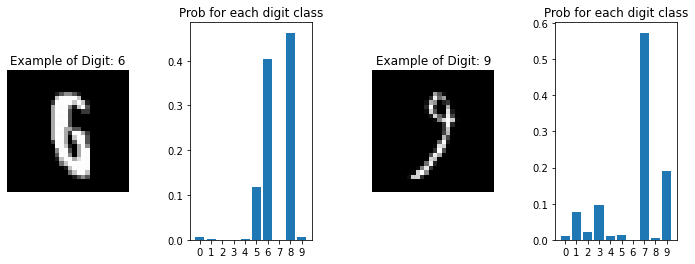

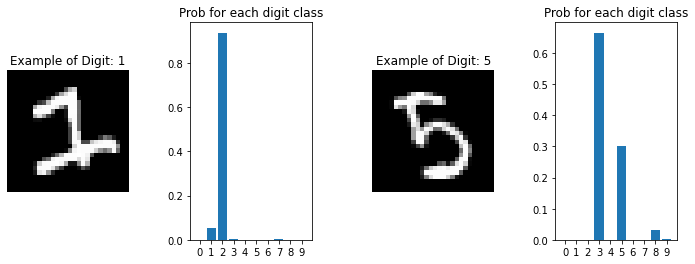

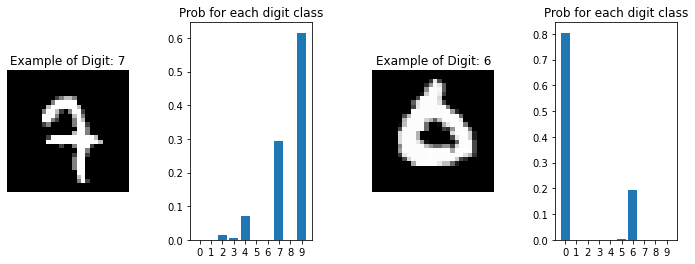

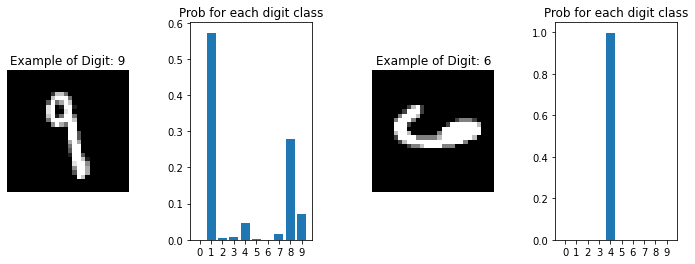

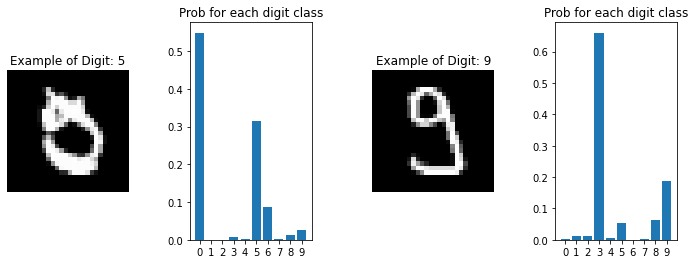

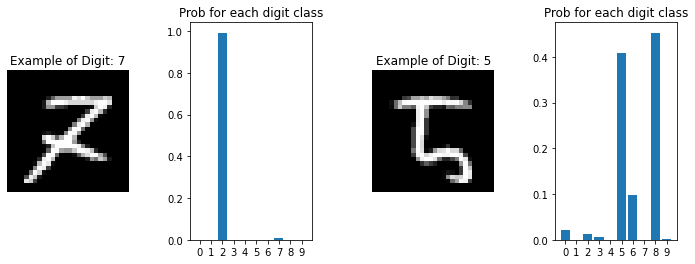

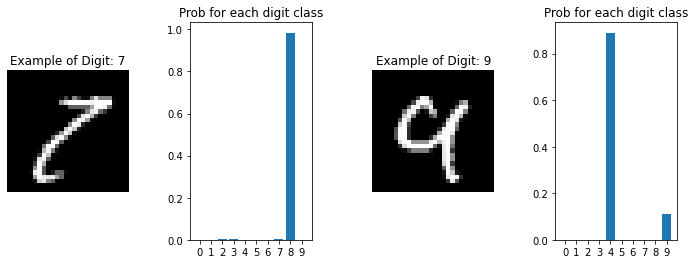

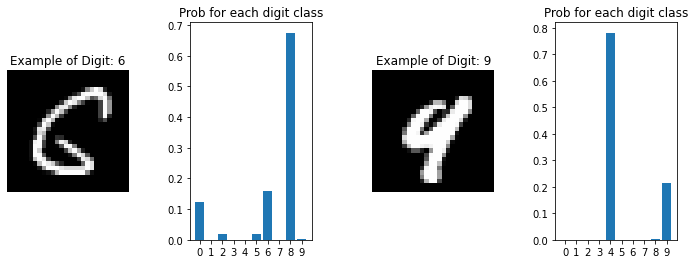

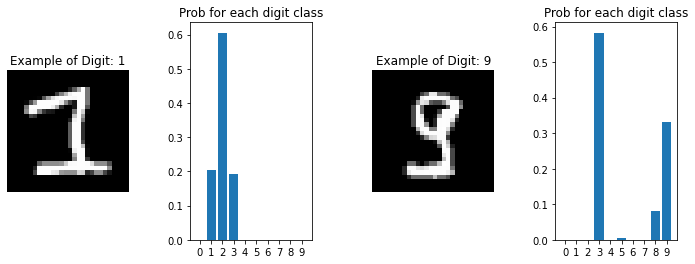

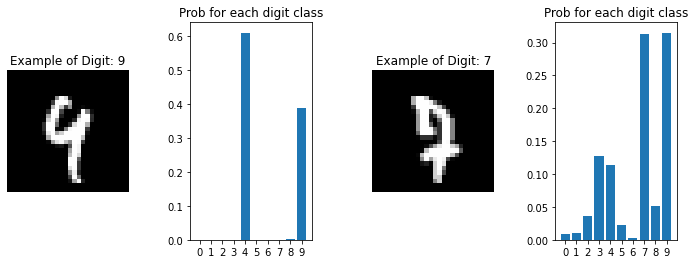

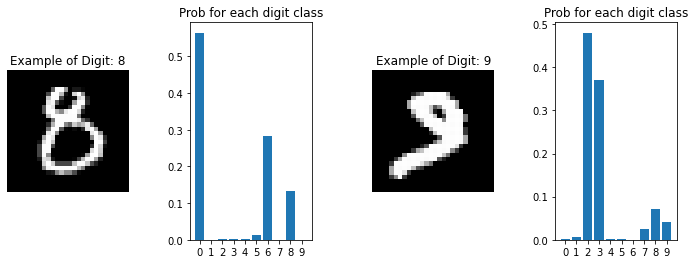

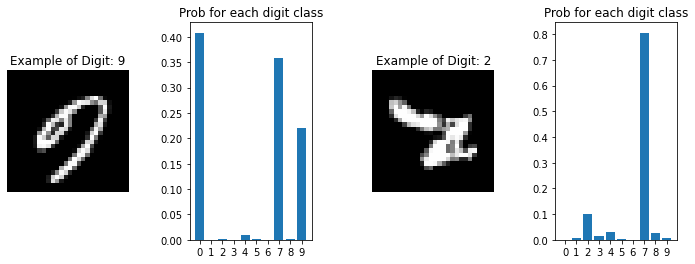

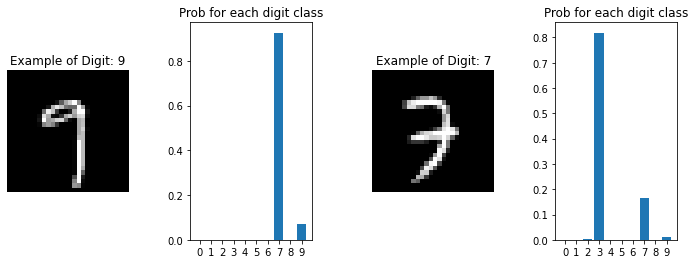

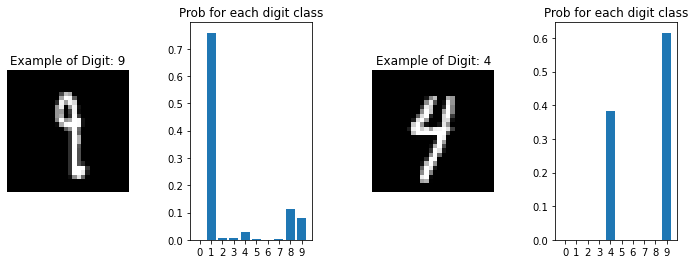

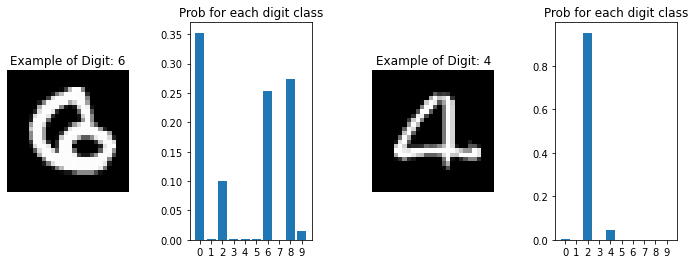

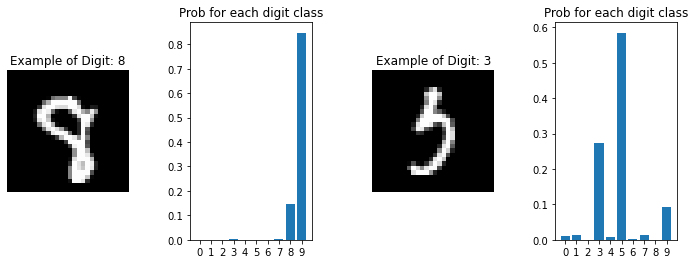

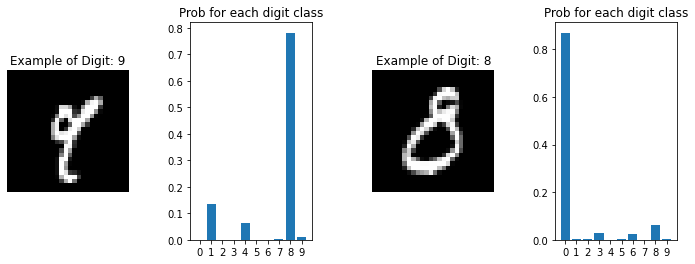

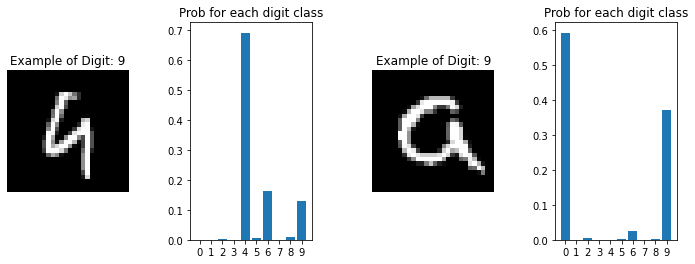

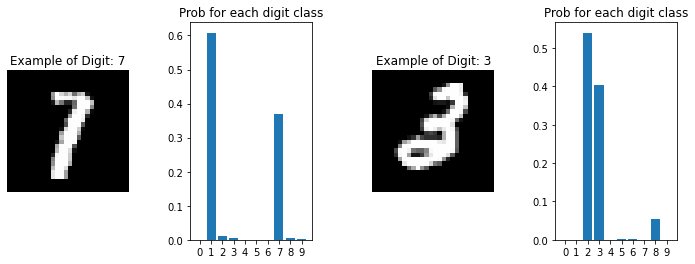

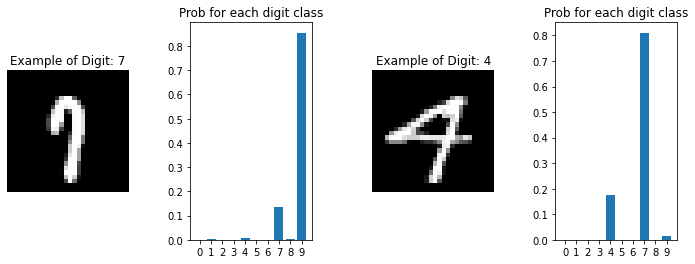

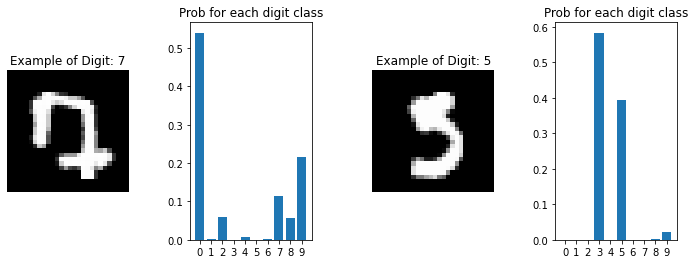

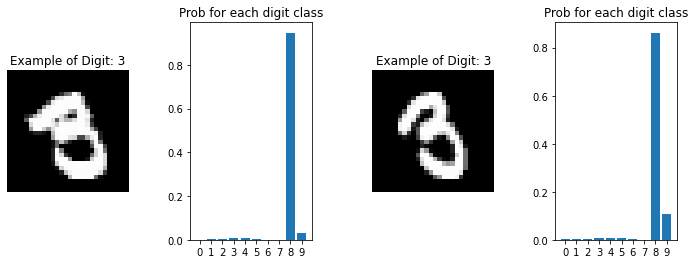

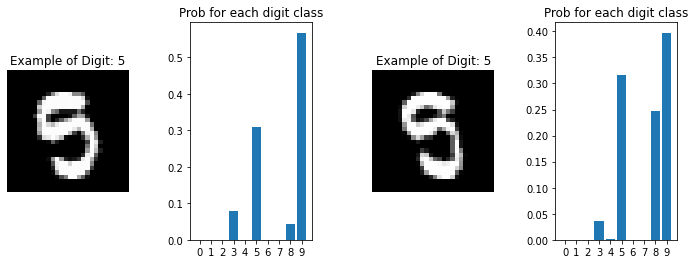

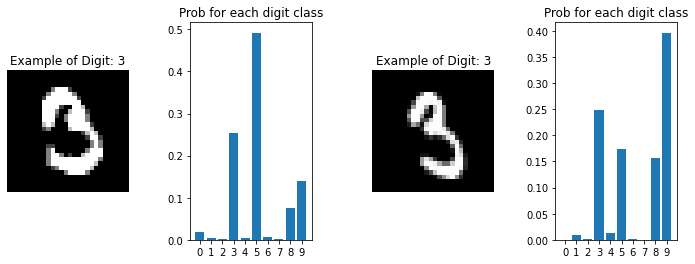

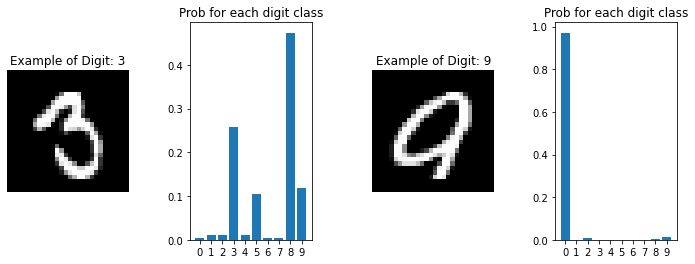

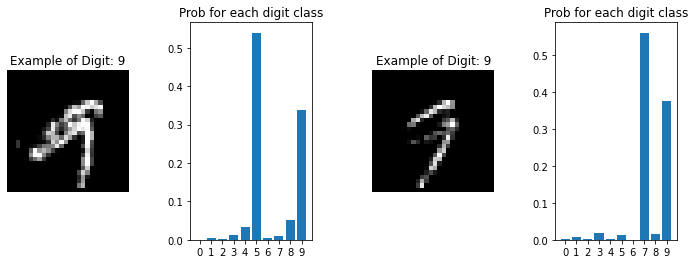

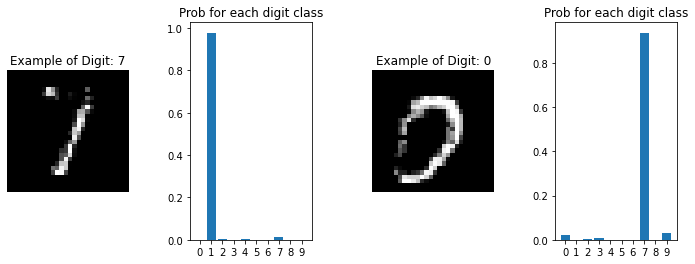

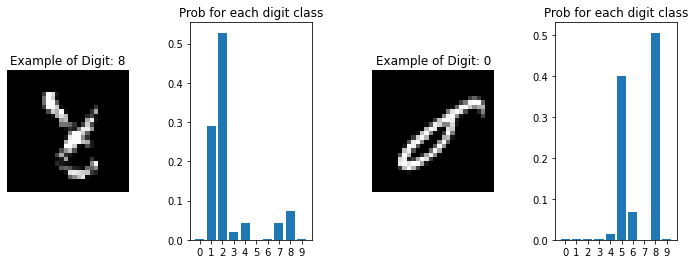

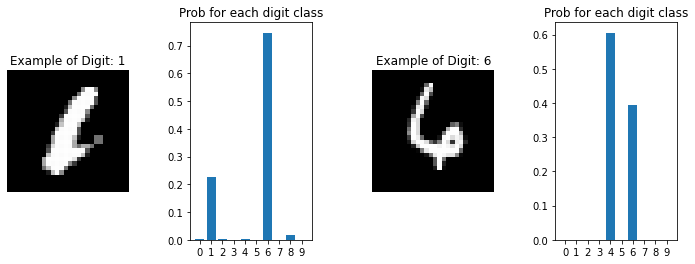

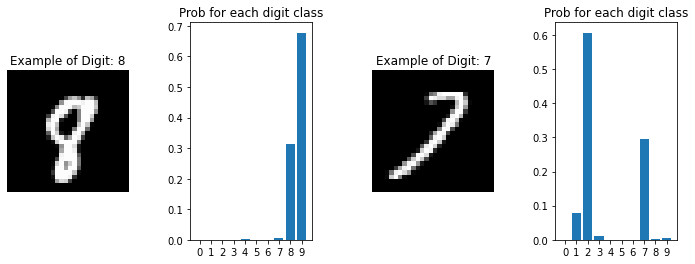

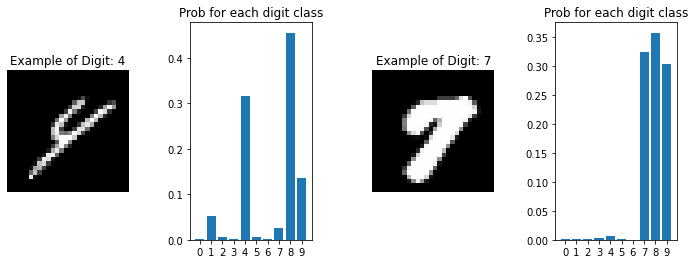

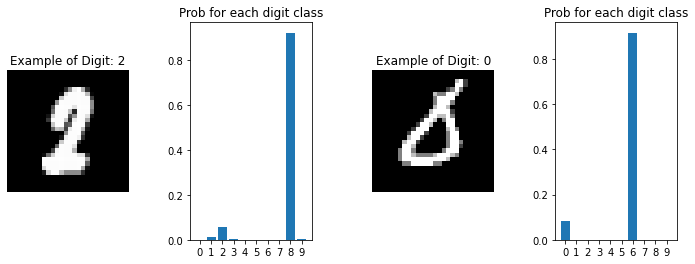

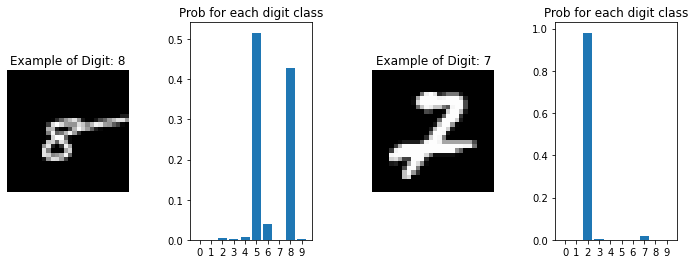

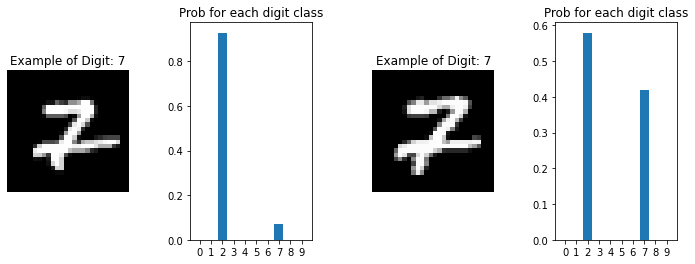

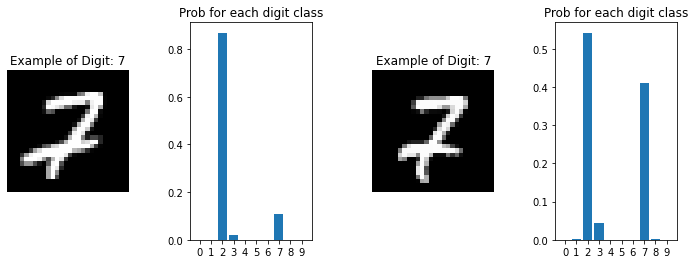

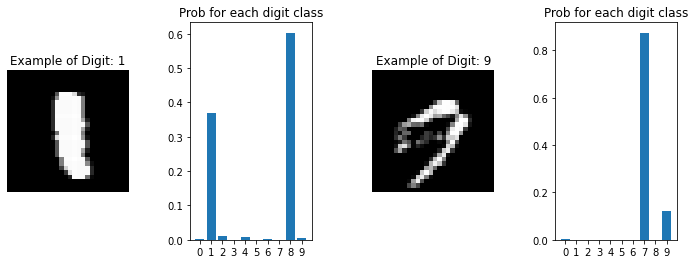

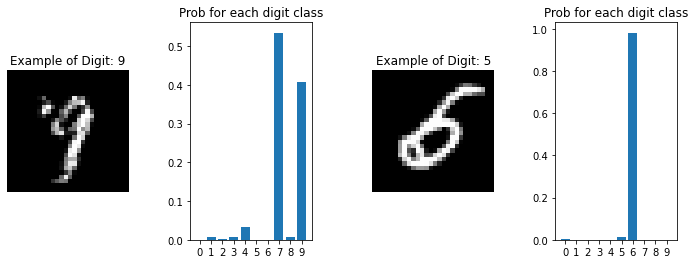

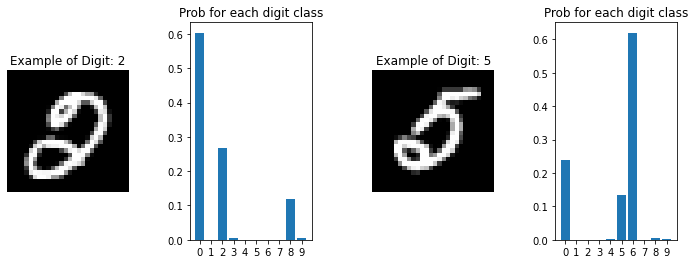

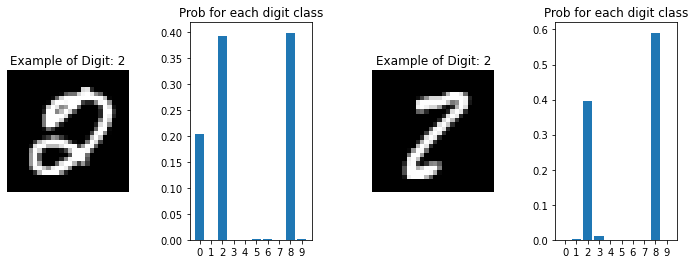

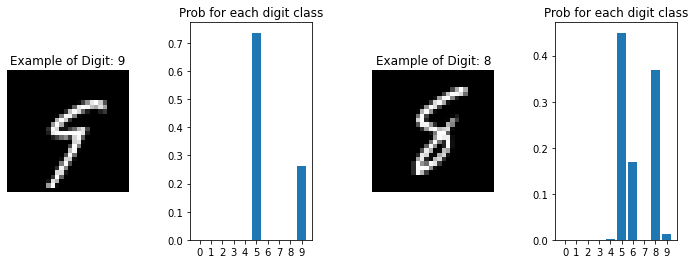

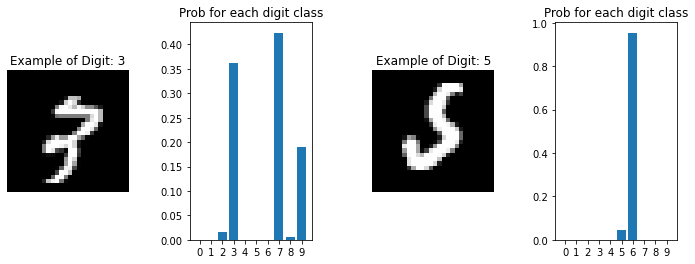

In [10]:
#印出CNN模型預測值與測試資料不相同的元素，及模型認為可能的答案
for i in range(len(Y_test_bk)):
    if Y_pred[i] != Y_test_bk[i]:
        listi.append(i)

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
for j in range(0, len(listi), 2):
    i=listi[j]
    digit = X_test[i].reshape(28, 28)
    X_test_digit = X_test[i].reshape(1, 28, 28, 1).astype("float32")
    X_test_digit = X_test_digit / 255
    probs = model.predict_proba(X_test_digit, batch_size = 1)

    plt.figure(figsize=[12, 4])
    plt.subplot(1,4,1)
    plt.title("Example of Digit: "+ str(Y_test_bk[i])) 
    plt.imshow(digit, cmap="gray")
    plt.axis("off")

    plt.subplot(1,4,2)
    plt.title("Prob for each digit class")
    plt.bar(np.arange(10), probs.reshape(10), align="center")
    plt.xticks(np.arange(10), np.arange(10).astype(str))

    i=listi[j+1]
    digit = X_test[i].reshape(28, 28)
    X_test_digit = X_test[i].reshape(1, 28, 28, 1).astype("float32")
    X_test_digit = X_test_digit / 255
    probs = model.predict_proba(X_test_digit, batch_size = 1)

    plt.subplot(1,4,3)
    plt.title("Example of Digit: "+ str(Y_test_bk[i])) 
    plt.imshow(digit, cmap="gray")
    plt.axis("off")

    plt.subplot(1,4,4)
    plt.title("Prob for each digit class")
    plt.bar(np.arange(10), probs.reshape(10), align="center")
    plt.xticks(np.arange(10), np.arange(10).astype(str))
    plt.subplots_adjust(wspace=.5)
    plt.show()